# Nature

`-` 마코프체인의 상태는 (1) positive recurrent (2) null recurrent (3) transient 로 나눌 수 있다. 

`-` **가짜정의:** HMC $\{X_t\}$의 어떠한 상태 $i$가 transient 하다는 의미는 그 상태에 일시적으로 머문다는 의미이다. 

> ChatGPT: "transient"는 한국어로 "일시적인" 또는 "잠깐의"라고 번역할 수 있습니다. 이 단어는 어떤 상태, 현상 또는 조건이 일시적이거나 잠시동안만 지속되는 것을 의미합니다.

$\sum_{t=0}^{\infty}p_{ii}^{(t)}<\infty$

`-` 1D random walk 

- $X_0=0$
- $p_{i,i+1}=p$ and $p_{i,i-1}=1-p$ 

$p_{00}^{(2t+1)}=0$

In [5]:
import numpy as np

In [25]:
init_dist = np.array([0]*500+[1]+[0]*500).reshape(-1,1)
init_dist

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [39]:
p = 0.5
P = np.zeros(1001*1001).reshape(1001,1001)
for i in range(1000):
    P[i,i+1] = p 
for i in range(1,1001):
    P[i,i-1] = 1-p

In [40]:
P

array([[0. , 0.5, 0. , ..., 0. , 0. , 0. ],
       [0.5, 0. , 0.5, ..., 0. , 0. , 0. ],
       [0. , 0.5, 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0.5, 0. , 0.5],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ]])

In [51]:
P@P@P@P@P@P@P@P

array([[0.0546875, 0.       , 0.109375 , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.1640625, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.109375 , 0.       , 0.2421875, ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.2421875, 0.       ,
        0.109375 ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.1640625,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.109375 , 0.       ,
        0.0546875]])

In [52]:
0.125*0.5*0.5

0.03125

In [58]:
T=0
(4*p*(1-p))**T/np.sqrt(np.pi*T)

<ipython-input-58-8b7ac5838e98>:2: RuntimeWarning: divide by zero encountered in scalar divide
  (4*p*(1-p))**T/np.sqrt(np.pi*T)


inf

In [57]:
np.linalg.matrix_power(P,T)

array([[0.04101562, 0.        , 0.08789062, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12890625, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08789062, 0.        , 0.20214844, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.20214844, 0.        ,
        0.08789062],
       [0.        , 0.        , 0.        , ..., 0.        , 0.12890625,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.08789062, 0.        ,
        0.04101562]])

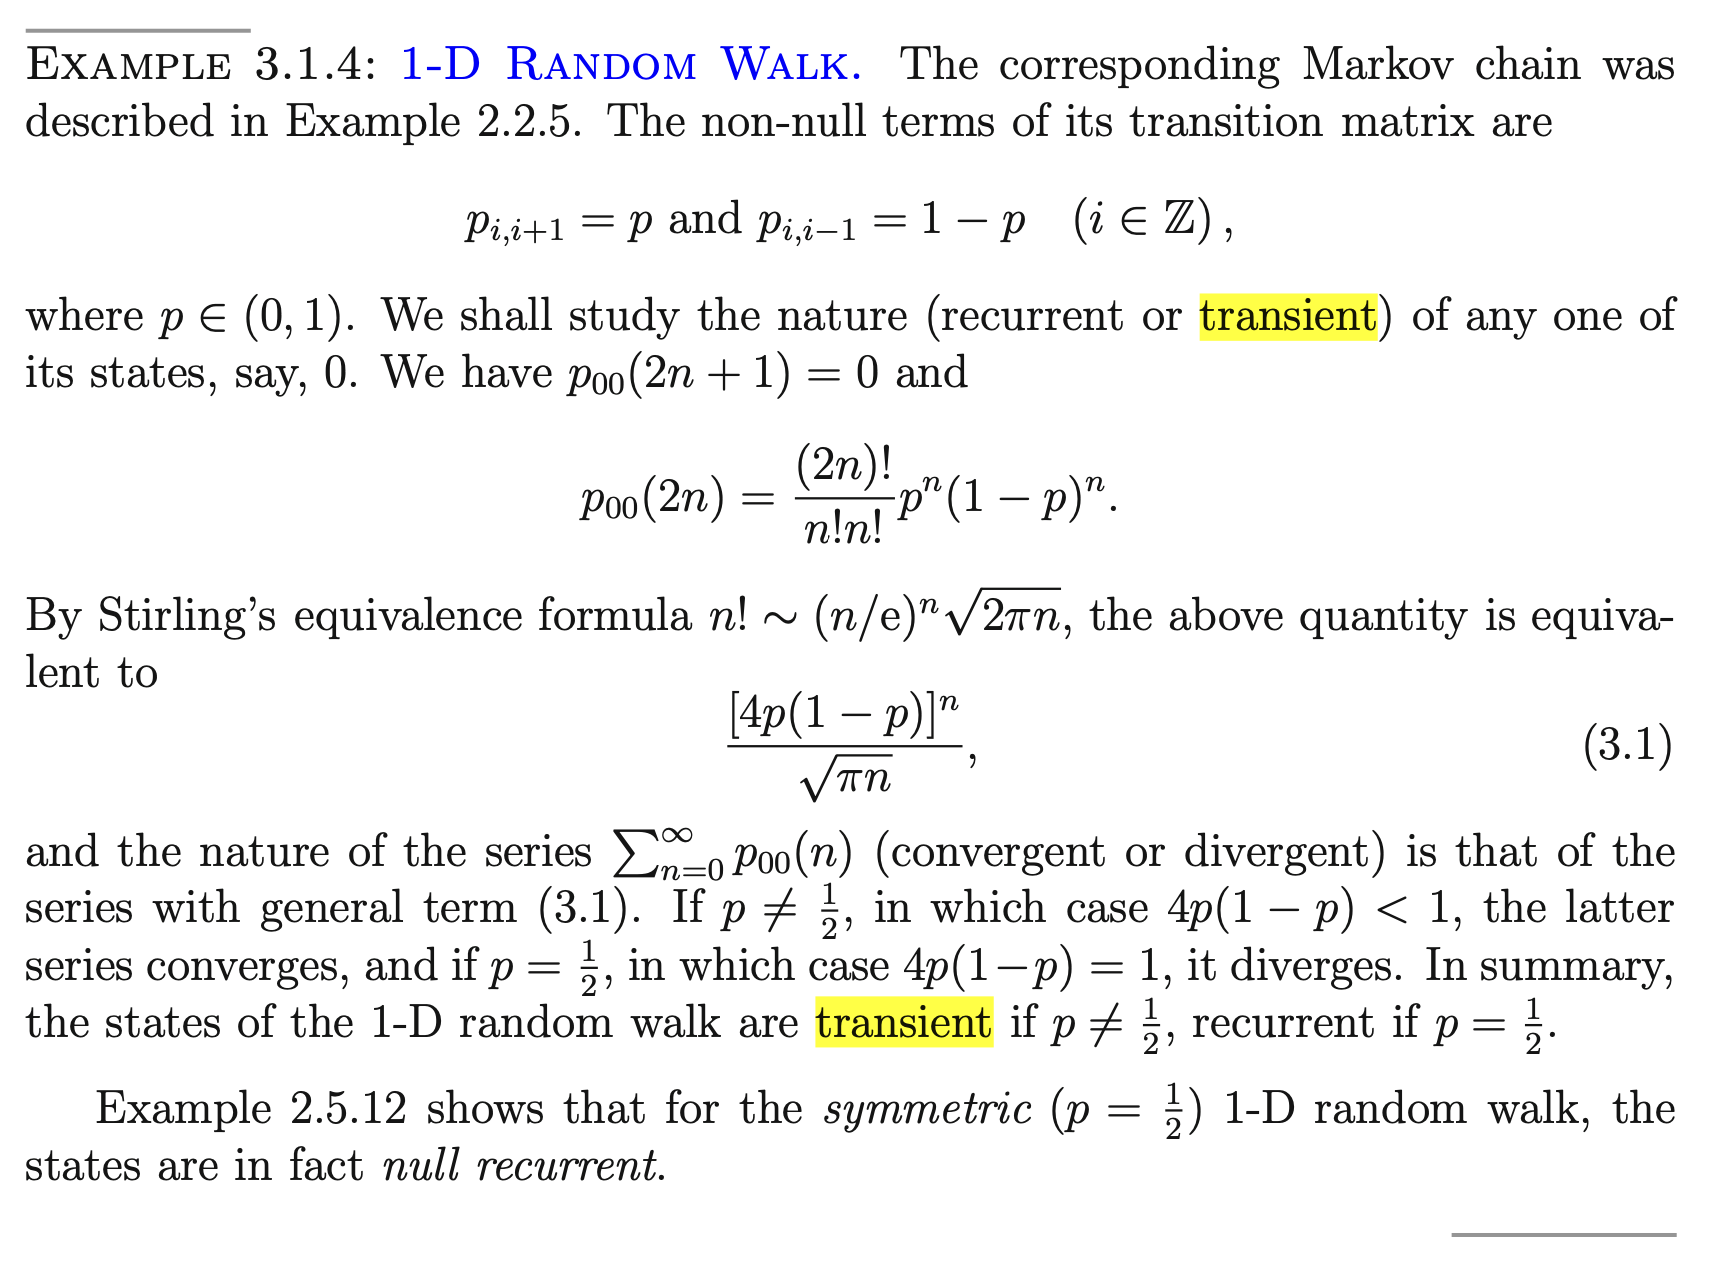


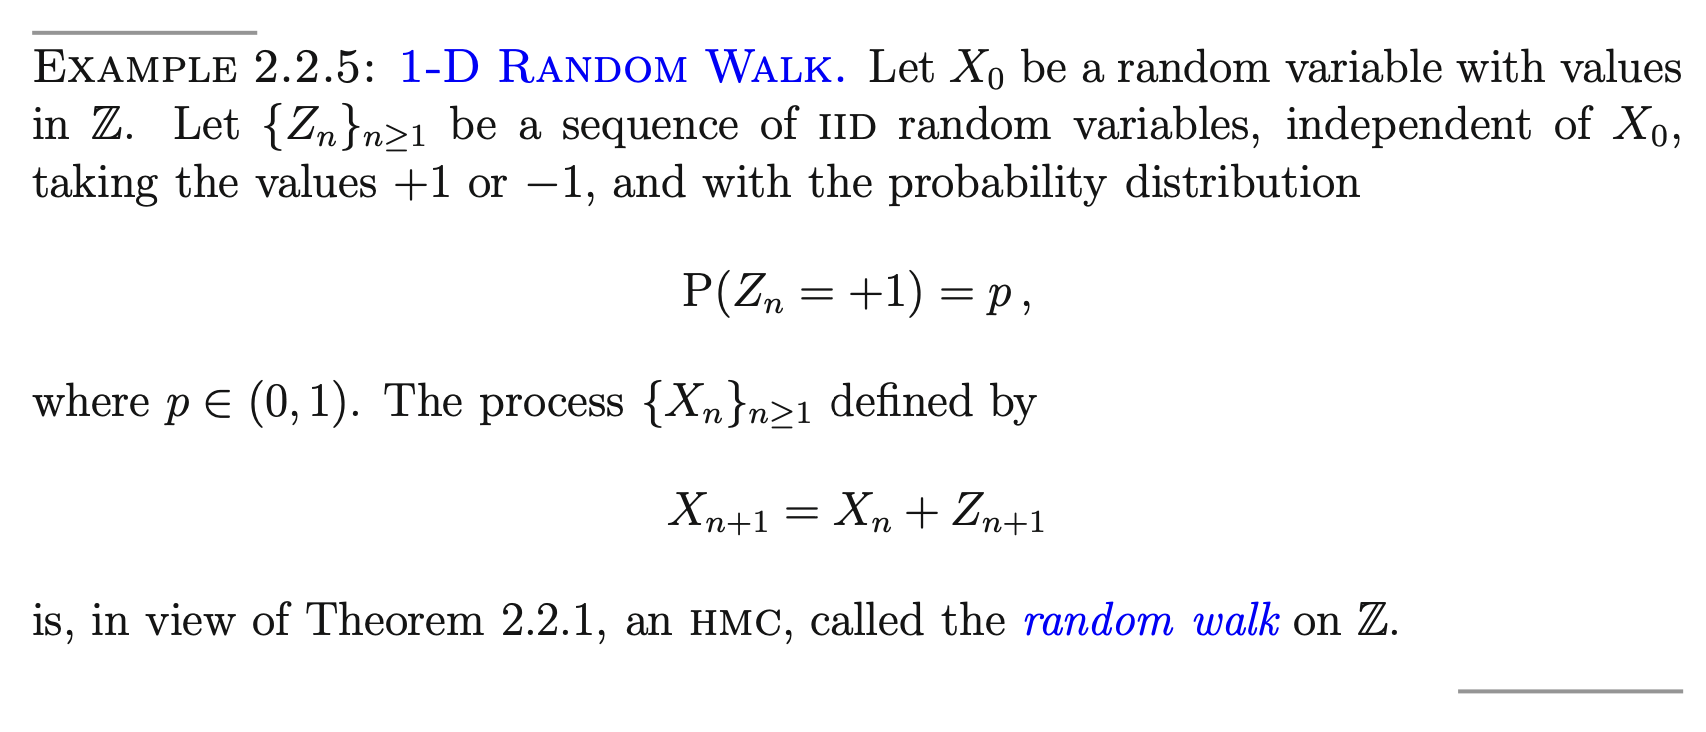

$N(i) = \sum_{t=0}^{\infty}1(X_t=i)= {\sf sum}({\bf X} == i)$

# Period 

# 마코프체인 이론들 

`-` **정의:** PRC, AP인 상태를 에르고딕 상태라고 부른다. [@이외숙2008확률과정론(p63)]

`-` **정의**: IRR, PRC, AP인 마코프체인을 에르고딕 마코프체인이라고 부른다. [@이외숙2008확률과정론(p69)] 

`-` **이론**: 극한분포가 수렴하고 동일한 row ${\bf p}_{\star}^\top$를 가지는 경우는 ${\bf p}_{\star}^\top {\bf 1} =0$ 이거나 ${\bf p}_{\star}^\top {\bf 1} =1$ 인 경우이다. 여기에서 ${\bf p}_{\star}^\top {\bf 1} =0$인 경우라면 정상분포 ${\boldsymbol \pi}$가 존재하지 않는다. 만약에 ${\bf p}_{\star}^\top {\bf 1}=1$ 인 경우라면 정상분포 ${\boldsymbol \pi}$가 존재하고 ${\bf p}_{\star}^\top ={\boldsymbol \pi}^\top$라고 쓸 수 있다.^[따라서 정상분포는 유일하게 존재한다.] [@이외숙2008확률과정론(p69)]

`-` **이론**: IRR, AP 이면 ${\bf P}$가 수렴하고 동일한 row를 가진다. [@이외숙2008확률과정론(p69)]

`-` **이론**: IRR, AP 이면 다음의 두 가지 중 하나가 성립한다. 

1. PRC인 마코프체인이 아니다: 모든상태가 transient 하거나 null recurrent 하다. 
2. PRC인 마코프체인이다: 모든상태가 positive recurrent 하다.  

1의 경우라면 $\sum_{i \in E}\pi_i=0$ 이 되어서 정상분포가 존재하지 않는다. 2의 경우라면 유일한 정상분포를 가진다. [@이외숙2008확률과정론(p69)]

> 만약에 상태공간이 유한인 상황이라면 항상 IRR, AP인 경우는 항상 PRC이다. 

`-` **이론**: IRR, AP, PRC $\Rightarrow$ (1) $\exists! {\boldsymbol \pi}$ (2) ${\boldsymbol \pi}^\top={\bf p}_{\star}^\top$ [@이외숙2008확률과정론(p69)]

`-` **이론**: IRR, AP, $\exists! {\boldsymbol \pi}$ $\Rightarrow$ (1) PRC (2) ${\boldsymbol \pi}^\top = {\bf p}_{\star}^\top$ [@이외숙2008확률과정론(p69),@durrett2012essentials(Thm1.19)]

- [@durrett2012essentials(Thm1.19)] 에서는 PRC임은 빠져있긴함. 

`-` **이론**: IRR, RC $\Rightarrow$ $\exists \tilde{\boldsymbol \pi}$ [@durrett2012essentials(Thm1.19)]

`-` **이론**: IRR, $\exists {\boldsymbol \pi}$ $\Rightarrow$ $\exists! {\boldsymbol \pi}$ 

`-` **이론**: IRR, $\exists {\boldsymbol \pi}$ $\Rightarrow$ 

$$\lim_{T\to \infty} \frac{1}{T}\sum_{t=0}^{T-1}f(X_t) = \mathbb{E}_{\boldsymbol \pi}[f(X_0)]:=\sum_{x}f(x)\pi(x)$$

|CaseNO|대표예제|FIN|IRR|AP|Nature|$\exists {\boldsymbol \pi}^\top$|$\exists! {\boldsymbol \pi}^\top$|$\exists! {\bf p}_{\star}^\top$|Ergodic THM|Ergodic HMC|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|1||X|O|X|T|X| X|X|X|X|
|2||X|O|X|NR|X| X|X|X|X
|3||X|O|X|PR|O| O|X|X|X|
|4||X|O|O|T|X| X|O|X|X|
|5||X|O|O|NR|X| X|O|X|X|
|6||X|O|O|PR|O| O|O|O|O|



`-` IRR, AP, $\exists {\boldsymbol \pi}$ $\Rightarrow$ $p^n(x,y) \to \pi(y)$ [@durrett2012essentials, Thm, @bremaud2020markov]

`-` IRR, RC $\Rightarrow$ $\frac{N_n(y)}{n} \to \frac{1}{E_yT_y}$

`-` IRR, $\exists {\boldsymbol \pi}$, $\sum_x|f(x)|\pi(x)<\infty$ $\Rightarrow$ $\frac{1}{n}\sum_{m=1}^{n}f(X_m) \to \sum_xf(x)\pi(x)$

`-` IRR, FINITE $\Rightarrow$ 정상분포가 존재하고 유일하다. 